<a href="https://colab.research.google.com/github/mayrtn/challengeAluraTelecom/blob/main/INFORME_TELECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
# Bloque 1: Extracción
import pandas as pd
import requests

# URL raw del JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar JSON
df = pd.read_json(url)

# Ver primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Bloque 2: Transformación
# 1. Aplanar columnas tipo dict
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_flat = pd.concat([df.drop(columns=['customer','phone','internet','account']),
                     df_customer, df_phone, df_internet, df_account], axis=1)

# 2. Limpiar columna Churn
df_flat = df_flat[df_flat['Churn'].isin(['Yes', 'No'])]

# 3. Convertir sí/no a 1/0
bool_cols = ['Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'MultipleLines',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies']

for col in bool_cols:
    if col in df_flat.columns:
        df_flat[col] = df_flat[col].map({'Yes': 1, 'No': 0})

df_flat['Churn'] = df_flat['Churn'].map({'Yes': 1, 'No': 0})

# 4. Renombrar columnas
df_flat.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
}, inplace=True)

# 5. Convertir a numérico
df_flat['MonthlyCharges'] = pd.to_numeric(df_flat['MonthlyCharges'], errors='coerce')
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')

# 6. Eliminar duplicados
df_flat = df_flat.drop_duplicates()

# 7. Revisar nulos
df_flat.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,682
InternetService,0


#📊 Carga y análisis

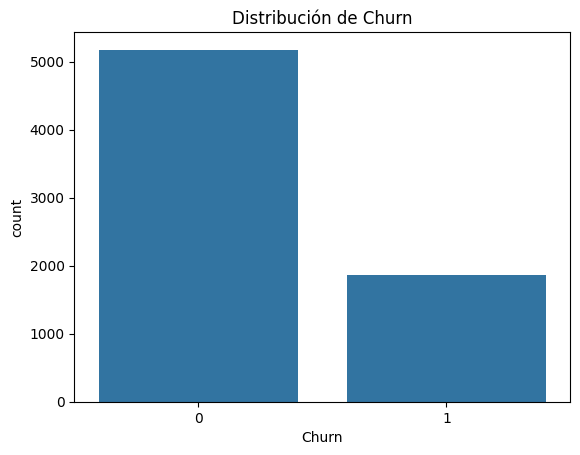

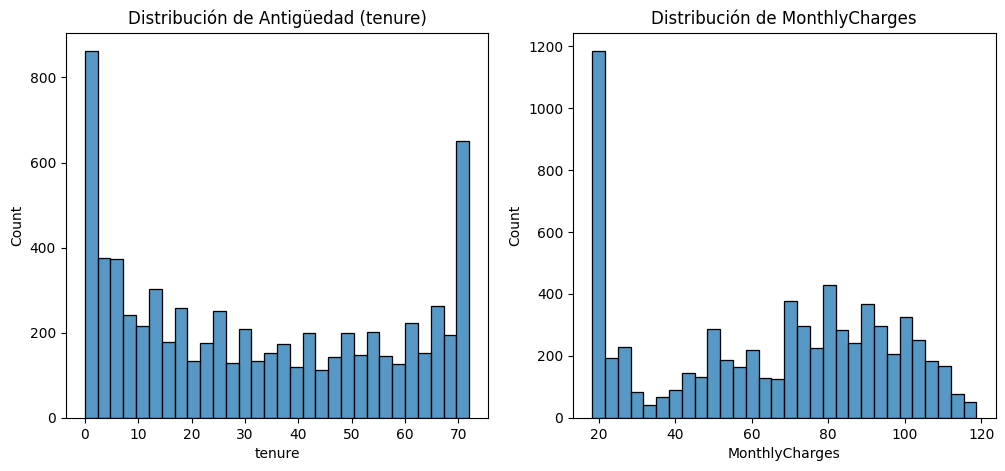

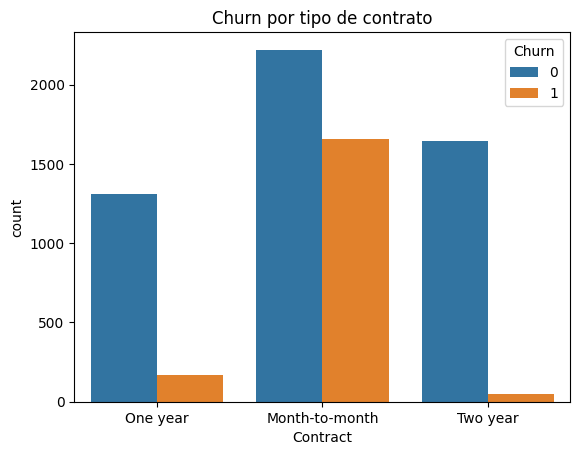

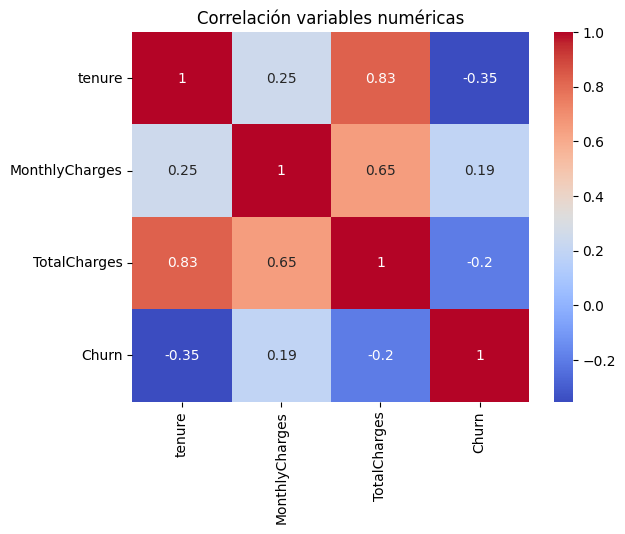

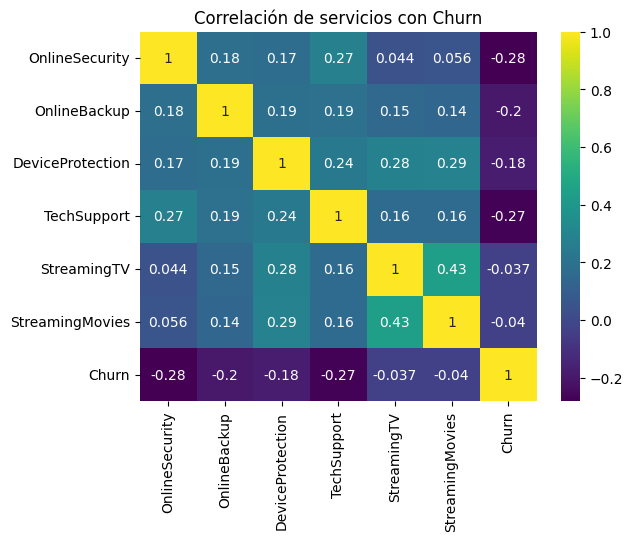

In [ ]:
# Bloque 3: Carga y Análisis
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución del target Churn
sns.countplot(x='Churn', data=df_flat)
plt.title('Distribución de Churn')
plt.show()

# 2. Distribución de Tenure y MonthlyCharges
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_flat['tenure'], bins=30)
plt.title('Distribución de Antigüedad (tenure)')

plt.subplot(1,2,2)
sns.histplot(df_flat['MonthlyCharges'], bins=30)
plt.title('Distribución de MonthlyCharges')
plt.show()

# 3. Relación Contract vs Churn
if 'Contract' in df_flat.columns:
    sns.countplot(x='Contract', hue='Churn', data=df_flat)
    plt.title('Churn por tipo de contrato')
    plt.show()

# 4. Correlación de variables numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.heatmap(df_flat[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación variables numéricas')
plt.show()

# 5. Análisis de servicios
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

sns.heatmap(df_flat[service_cols + ['Churn']].corr(), annot=True, cmap='viridis')
plt.title('Correlación de servicios con Churn')
plt.show()


#📄Informe final

# Informe de Análisis de Evasión de Clientes (Churn)

## Introducción
El objetivo de este análisis es explorar los factores que influyen en la evasión de clientes (Churn) de la empresa de telecomunicaciones. Se busca identificar patrones y características que puedan ayudar a reducir la pérdida de clientes.

## Limpieza y Tratamiento de Datos
- Se cargaron los datos desde un JSON en GitHub.
- Se aplanaron las columnas que contenían diccionarios (`customer`, `phone`, `internet`, `account`) con `pd.json_normalize`.
- Se eliminaron duplicados y valores vacíos en la columna `Churn`.
- Se convirtieron columnas categóricas tipo "Yes"/"No" a 1/0.
- Se renombraron y convirtieron a numérico las columnas de facturación (`MonthlyCharges` y `TotalCharges`).

## Análisis Exploratorio de Datos
- **Distribución de Churn:** La mayoría de los clientes no abandonan, pero hay un grupo importante que sí.
- **Relación Tenure / MonthlyCharges:** Los clientes nuevos tienen más riesgo de abandono. Clientes con mayor gasto mensual tienden a quedarse más.
- **Tipo de contrato:** Contratos a corto plazo muestran más evasión.
- **Servicios adicionales:** Seguridad en línea y soporte técnico se correlacionan negativamente con Churn (menos abandono).
- **Correlaciones:** Tenure y servicios adicionales son indicadores importantes del abandono.

## Conclusiones e Insights
- Los clientes con menor antigüedad y contratos mes a mes son los más propensos a abandonar.
- Algunos servicios (OnlineSecurity, TechSupport) ayudan a retener clientes.
- Facturación mensual muy alta no garantiza abandono, pero es un factor a considerar en análisis combinados.

## Recomendaciones
- Incentivar contratos más largos para clientes nuevos.
- Promover servicios adicionales que reduzcan la probabilidad de Churn.
- Implementar campañas personalizadas para clientes con menor tenure y alto riesgo de abandono.
- Monitorear continuamente los indicadores de abandono para ajustar estrategias.

